In [1]:
# import your libraries here
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess
import nltk
nltk.download('punkt')
import random
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santoshsaranyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("training_data_processed.csv")
df = df.drop(columns=["Unnamed: 0","Unnamed: 0.1"], axis=1)
df.head()

,Artist,SName,Lyric,Genre,LyricProcessed
0,Ivete Sangalo,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,pop,"[['feel', 'unsure'], ['take', 'hand', 'lead', ..."
1,Ivete Sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",pop,"[['dont', 'let', 'fool', 'ya'], ['even', 'try'..."
2,Ivete Sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",pop,"[['baby', 'let', 'cruise', 'away'], ['dont', '..."
3,Ivete Sangalo,Easy,"Know it sounds funny\nBut, I just can't stand ...",pop,"[['know', 'sound', 'funny'], ['cant', 'stand',..."
4,Ivete Sangalo,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,pop,"[['youve', 'get', 'look'], ['one', 'hop', 'lad..."


In [3]:
df['Genre'] = df['Genre'].str.lower()
df['Genre'] = df['Genre'].apply(lambda x: "punk" if "punk" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "rock" if "rock" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "jazz" if "jazz" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "pop" if "pop" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "metal" if "metal" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "rap" if "rap" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "hip-hop" if ("hip-hop" in x or "hip hop" in x or "hiphop" in x) else x)
df['Genre'] = df['Genre'].apply(lambda x: "country" if "country" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "rnb" if ("rnb" in x or "r&b" in x or "r n b" in x or "r & b" in x or "rhythm & blues" in x or "rhythm and blues" in x or "rhythm n blues" in x) else x)
df = df.groupby('Genre').filter(lambda x: len(x) > 400)
print("Number of genres: ",df['Genre'].nunique())
df['Genre'].value_counts()

Number of genres:  41


rock                 29916
metal                19420
pop                  12812
hip-hop              10333
indie                 6020
rap                   4535
rnb                   4207
soul                  3739
punk                  3440
country               3135
jazz                  2969
electronic            2816
folk                  2724
alternative           1994
blues                 1838
reggae                1697
cover                 1631
christian             1321
new wave              1314
80s                   1301
female vocalists      1157
oldies                1126
christmas             1118
grunge                1053
funk                   985
dance                  976
worship                803
acoustic               783
60s                    717
soundtrack             664
singer-songwriter      628
trance                 606
70s                    567
trip-hop               538
house                  537
grindcore              510
post-hardcore          475
f

In [4]:
df['LyricsList'] = df.apply(lambda x: eval(x['LyricProcessed']), axis=1)
df.head()

,Artist,SName,Lyric,Genre,LyricProcessed,LyricsList
0,Ivete Sangalo,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,pop,"[['feel', 'unsure'], ['take', 'hand', 'lead', ...","[[feel, unsure], [take, hand, lead, dance, flo..."
1,Ivete Sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",pop,"[['dont', 'let', 'fool', 'ya'], ['even', 'try'...","[[dont, let, fool, ya], [even, try, school, ya..."
2,Ivete Sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",pop,"[['baby', 'let', 'cruise', 'away'], ['dont', '...","[[baby, let, cruise, away], [dont, confuse, wa..."
3,Ivete Sangalo,Easy,"Know it sounds funny\nBut, I just can't stand ...",pop,"[['know', 'sound', 'funny'], ['cant', 'stand',...","[[know, sound, funny], [cant, stand, pain], [g..."
4,Ivete Sangalo,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,pop,"[['youve', 'get', 'look'], ['one', 'hop', 'lad...","[[youve, get, look], [one, hop, lad], [face, b..."


In [5]:
processed_lyrics = df['LyricsList'].explode().to_list()
processed_lyrics[:5]

[['feel', 'unsure'],
 ['take', 'hand', 'lead', 'dance', 'floor'],
 ['music', 'dy', 'something', 'eye'],
 ['call', 'mind', 'silver', 'screen'],
 ['sad', 'goodbye']]

In [6]:
w2v_model = Word2Vec(sentences = processed_lyrics, vector_size=200, sg = 1, window = 3, min_count = 2)

In [7]:
len(w2v_model.wv)

108639

In [8]:
# Visualize for W2V MODEL

# Selecting a subset of the word embeddings
keys = ['crazy', 'face', 'caught', 'fool', 'gold', 'love', 'rock', 'hell']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.wv.most_similar(word, topn=20):
        words.append(similar_word)
        embeddings.append(w2v_model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [9]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/Users/santoshsaranyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/santoshsaranyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


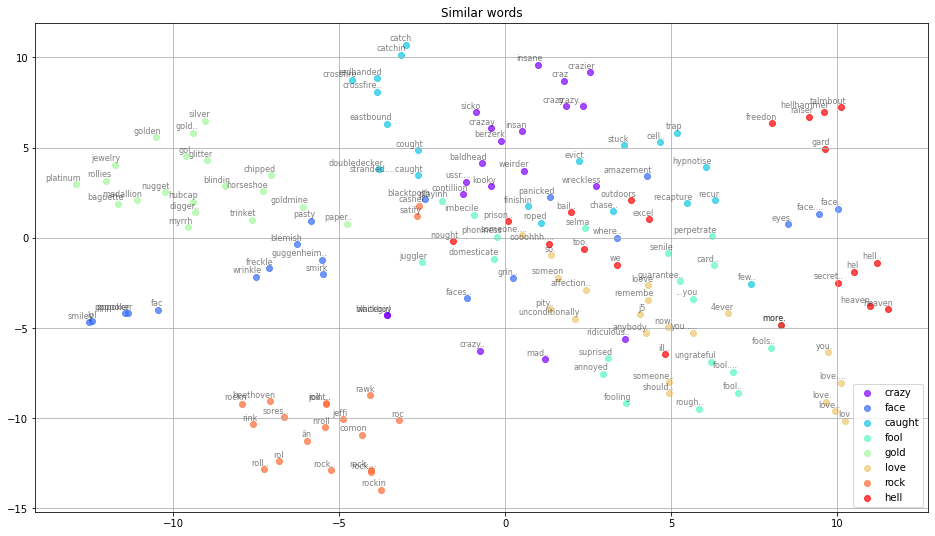

In [10]:
# % matplotlib inline
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, color=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [72]:
w2v_model.wv.save_word2vec_format('w2v_embeddings.txt', binary = False)